# Fine-Tuning Transformer Models for Fake News Tweet Detection on TruthSeeker Dataset
Talia Berler

CSC616

Dr. Stephen Dennis

This Google Colab Notebook is for visualization of the data and preprocessing involving feature selection, cleaning, and generation.

In [1]:
# ----------------------------
# Install Required Libraries, Set PATH to Data, Mount Drive
# ----------------------------

# Set Global Paths
PATH = '/content/drive/MyDrive/Spring \'25/CSC616/'
INPUT = 'TruthSeeker2023/Truth_Seeker_Model_Dataset.csv'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.'
 'The Trump administration worked to free 5,000 Taliban prisoners.'
 'In Afghanistan, over 100 billion dollars spent on military contracts.'
 ...
 '"You weren\'t allowed to own a cannon during the Revolutionary War as an individual."'
 'If you are licensed to carry a concealed weapon, wearing a face covering for coronavirus "removes your conceal carry ability."'
 'Joe Bidens great-grandfather Joseph J. Biden was a slave-owner and fought for the Confederacy.']
Number of unique news statements: 1058
target
True     68930
False    65268
Name: count, dtype: int64
target
True     0.513644
False    0.486356
Name: proportion, dtype: float64


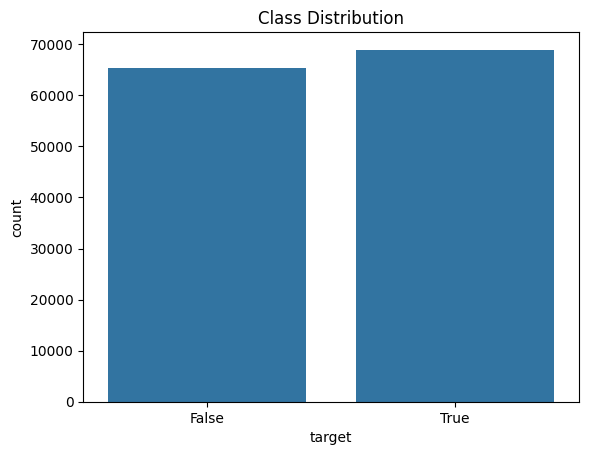

Index(['Unnamed: 0', 'author', 'statement', 'target', 'BinaryNumTarget',
       'manual_keywords', 'tweet', '5_label_majority_answer',
       '3_label_majority_answer'],
      dtype='object')


In [17]:
# ----------------------------
# Load & Explore the Data
# ----------------------------

# Import libraries
import os
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv(PATH+INPUT)

# Basic info
print(df['statement'].unique())
print(f"Number of unique news statements: {len(df['statement'].unique())}")
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))
df.head()

# Visualize class distribution
sns.countplot(data=df, x='target')
plt.title('Class Distribution')
plt.show()

# Print column names
print(df.columns)

# WordCloud Function
def wordcloud(df,real):
  texts = df[df['target'] == real]['statement'].unique()
  # WordCloud for Real Tweets
  texts_str = " ".join(texts)
  wordcloud = WordCloud(width=800, height=400).generate(texts_str)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'{real} News WordCloud')
  save_path = os.path.join(os.path.dirname(PATH), f'{real}_wordcloud.png')
  # plt.savefig(save_path)
  plt.show()

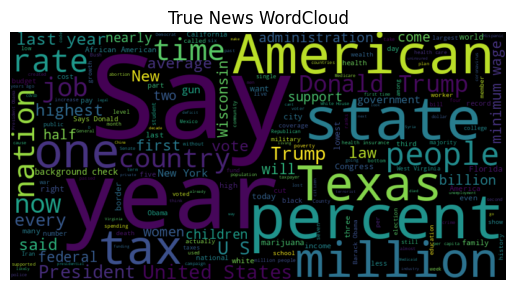

In [ ]:
# WordCloud of True News Statements
wordcloud(df,True)

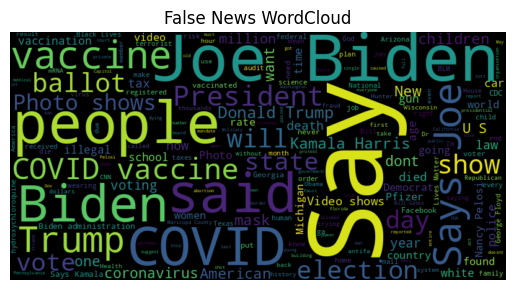

In [ ]:
# WordCloud of Fake News Statements
wordcloud(df,False)

In [6]:
# ----------------------------
# Perform Data Preprocessing
# and Feature Selection and
# Engineering
# ----------------------------

# Function to load data, select features, and generate features
def load_data(path):
    # Load dataset
    print(f"Loading data from {path+INPUT}")
    df = pd.read_csv(path+INPUT)
    df = df[['statement', 'target', 'BinaryNumTarget','tweet','3_label_majority_answer']]

    # Define the conditions and corresponding values for new target
    conditions = [
        (df['BinaryNumTarget'] == 1.0) & (df['3_label_majority_answer'] == 'Agree'),
        (df['BinaryNumTarget'] == 0.0) & (df['3_label_majority_answer'] == 'Disagree'),
    ]
    values = [1.0, 1.0]

    # Default is 0.0 or False
    df['NEW_TARGET'] = np.select(conditions, values, default=0.0)
    df = df.dropna(subset=["tweet", "NEW_TARGET"])
    df["text"] = df["tweet"].astype(str)
    df["label"] = df["NEW_TARGET"].astype(int)
    new_df = df[["text", "label"]]
    print(f"Data loaded successfully. Shape: {new_df.shape}")

    # Save new dataset
    save_path = os.path.join(os.path.dirname(path), "new_dataset.csv")
    new_df.to_csv(save_path, index=False)
    print(f"New dataset saved to {save_path}")

    return new_df

new_df = load_data(PATH)

Loading data from /content/drive/MyDrive/Spring '25/CSC616/TruthSeeker2023/Truth_Seeker_Model_Dataset.csv
Data loaded successfully. Shape: (134198, 2)
New dataset saved to /content/drive/MyDrive/Spring '25/CSC616/new_dataset.csv


In [9]:
df = pd.read_csv(PATH+INPUT)
print(df.shape)
print("Input dataset head:")
df.head()


(134198, 9)
Input dataset head:


,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [10]:
print("New dataset head:")
print(new_df.shape)
new_df.head()

New dataset head:
(134198, 2)


,text,label
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1
2,THE SUPREME COURT is siding with super rich pr...,1
3,@POTUS Biden Blunders\n\nBroken campaign promi...,1
4,@OhComfy I agree. The confluence of events rig...,1


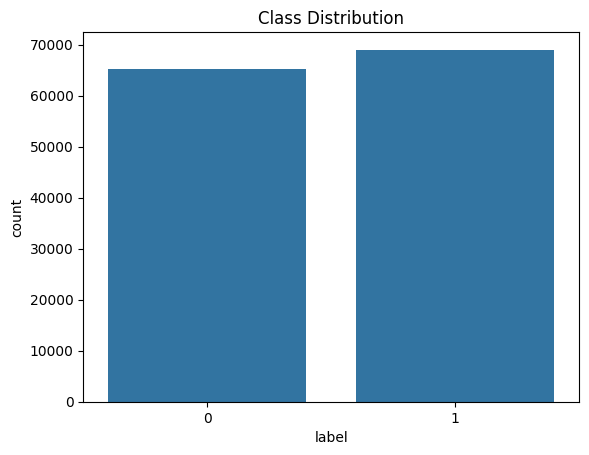

label
1    68985
0    65213
Name: count, dtype: int64
label
1    0.514054
0    0.485946
Name: proportion, dtype: float64


In [16]:
# Visualize label distribution in new dataset
sns.countplot(data=new_df, x='label')
plt.title('Class Distribution')
plt.show()

# Print class distribution counts
print(new_df['label'].value_counts())

# Print percentage distribution
print(new_df['label'].value_counts(normalize=True))